# Identificando features

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import os
import seaborn as sb
import numpy as np
from scipy import stats



print(os.listdir("/Users/geraldine/Documents/IDS/DATASET/datafour"))

['.DS_Store', 'new_data_test.csv', 'new_data_train_copy.csv', 'new_data_test_copy.csv', 'new_data_train.csv']


In [2]:
pd.options.display.max_columns = None

In [3]:
train=pd.read_csv("/Users/geraldine/Documents/IDS/DATASET/datafour/new_data_train.csv", index_col = 0)
train.head()

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,attack
0,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,508,508,0.0,0.0,1.00,0.00,0.0,255,255,0.0,1.0,0.0,1
1,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,1.00,0.00,0.0,255,255,0.0,1.0,0.0,1
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,152,4,1.0,0.0,0.03,0.09,0.0,255,4,0.1,0.0,0.0,1
3,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,1.00,0.00,0.0,255,255,0.0,1.0,0.0,1
4,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,1.00,0.00,0.0,255,255,0.0,1.0,0.0,1


In [4]:
train.shape

(3428901, 33)

In [5]:
test=pd.read_csv("/Users/geraldine/Documents/IDS/DATASET/datafour/new_data_test.csv", index_col = 0)
test.head()

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,attack
0,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,510,510,0.0,0.0,1.00,0.00,0.0,255,255,0.00,1.0,0.0,1
1,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,1.00,0.00,0.0,255,255,0.00,1.0,0.0,1
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,268,11,1.0,0.0,0.04,0.06,0.0,255,11,0.08,0.0,0.0,1
3,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,122,13,1.0,0.0,0.11,0.07,0.0,255,13,0.06,0.0,0.0,1
4,0,icmp,ecr_i,SF,520,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,1.00,0.00,0.0,255,255,0.00,1.0,0.0,1


In [6]:
test.shape

(1469529, 33)

## Encontrando los features categoricos

In [7]:
columns_numeric = train._get_numeric_data().columns

category_columns = list(set(train.columns)-set(columns_numeric))
category_columns

['service', 'protocol_type', 'flag']

In [8]:
columns_numeric_test = test._get_numeric_data().columns

category_columns_test = list(set(test.columns)-set(columns_numeric))
category_columns_test

['service', 'protocol_type', 'flag']

Text(0.5, 1.0, 'Ataques')

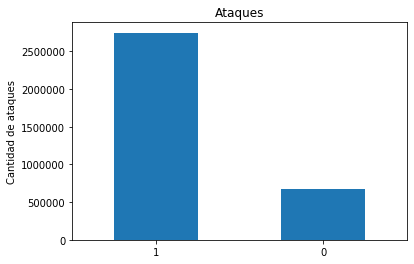

In [9]:
# Grafico de barras para ataque
train['attack'].value_counts().plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Cantidad de ataques')
plt.title('Ataques')

Del anterior podemos ver que hubo mas de 2000000 cantidad de ataque

In [10]:
train.shape

(3428901, 33)

In [11]:
test.shape

(1469529, 33)

In [12]:
train.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files',
       'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'attack'],
      dtype='object')

In [13]:
test.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files',
       'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'attack'],
      dtype='object')

# Distrubucion de los datos train y test

In [14]:
print('Conjunto de datos categoricos Train:')
train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)



Conjunto de datos categoricos Train:


protocol_type     3
service          69
flag             11
dtype: int64

In [15]:
print('--'*30)
print('Distribuacion de categoricos en service:')
print(train['service'].value_counts().sort_values(ascending=False).head())
print('--'*30)
print('Distribuacion de categoricos en protocol_type:')
print(train['protocol_type'].value_counts().sort_values(ascending=False).head())
print('--'*30)
print('Distribuacion de categoricos en flag:')
print(train['flag'].value_counts().sort_values(ascending=False).head())

------------------------------------------------------------
Distribuacion de categoricos en service:
ecr_i      1968723
private     770315
http        436037
smtp         67668
other        50717
Name: service, dtype: int64
------------------------------------------------------------
Distribuacion de categoricos en protocol_type:
icmp    1984129
tcp     1308989
udp      135783
Name: protocol_type, dtype: int64
------------------------------------------------------------
Distribuacion de categoricos en flag:
SF      2621340
S0       608530
REJ      188254
RSTR       5684
RSTO       3725
Name: flag, dtype: int64


In [16]:
print('Conjunto de datos categoricos Test:')
test.select_dtypes('object').apply(pd.Series.nunique, axis = 0)



Conjunto de datos categoricos Test:


protocol_type     3
service          67
flag             11
dtype: int64

In [17]:
print('--'*30)
print('Distribuacion de categoricos en service:')
print(test['service'].value_counts().sort_values(ascending=False).head())
print('--'*30)
print('Distribuacion de categoricos en protocol_type:')
print(test['protocol_type'].value_counts().sort_values(ascending=False).head())
print('--'*30)
print('Distribuacion de categoricos en flag:')
print(test['flag'].value_counts().sort_values(ascending=False).head())

------------------------------------------------------------
Distribuacion de categoricos en service:
ecr_i      842937
private    330516
http       187053
smtp        28886
other       21936
Name: service, dtype: int64
------------------------------------------------------------
Distribuacion de categoricos en protocol_type:
icmp    849416
tcp     561608
udp      58505
Name: protocol_type, dtype: int64
------------------------------------------------------------
Distribuacion de categoricos en flag:
SF      1122987
S0       261299
REJ       80620
RSTR       2410
RSTO       1619
Name: flag, dtype: int64


Analizando la distribuccion de train y test anterior vemos que en total para train tenemos: 83 datos categoricos y para Test tenemos: 81 datos categoricos, podemos ver que la distribucion es pareja, y en lo que muestra que el conjunto de datos tiene menos variables categoricas siendo un total de 1 variable faltante.

# Feature Engenering

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [19]:
train.protocol_type.unique()

array(['icmp', 'tcp', 'udp'], dtype=object)

In [20]:
train.service.unique()

array(['ecr_i', 'private', 'other', 'http', 'netbios_ssn', 'smtp',
       'ftp_data', 'domain_u', 'urp_i', 'Z39_50', 'eco_i', 'uucp',
       'shell', 'domain', 'daytime', 'nntp', 'sql_net', 'finger',
       'http_443', 'systat', 'ftp', 'remote_job', 'ntp_u', 'ldap',
       'printer', 'netbios_ns', 'time', 'telnet', 'pop_2', 'gopher',
       'auth', 'IRC', 'efs', 'exec', 'link', 'hostnames', 'netbios_dgm',
       'iso_tsap', 'discard', 'login', 'nnsp', 'ssh', 'csnet_ns', 'rje',
       'echo', 'netstat', 'whois', 'imap4', 'vmnet', 'klogin', 'courier',
       'pop_3', 'ctf', 'mtp', 'uucp_path', 'sunrpc', 'bgp', 'name',
       'supdup', 'kshell', 'urh_i', 'X11', 'red_i', 'pm_dump', 'aol',
       'tftp_u', 'http_8001', 'tim_i', 'harvest'], dtype=object)

In [21]:
train.flag.unique()

array(['SF', 'S0', 'REJ', 'RSTO', 'RSTR', 'SH', 'S1', 'RSTOS0', 'OTH',
       'S2', 'S3'], dtype=object)

Guardamos una copia de nuestro set de datos hasta el momento.

In [22]:
train.to_csv("/Users/geraldine/Documents/IDS/DATASET/datafour/new_data_train_copy.csv")

In [23]:
test.to_csv("/Users/geraldine/Documents/IDS/DATASET/datafour/new_data_test_copy.csv")

## Transformacion de mis features con LabelEncoder

In [24]:
#transforma mis variables categoricas en numéricas.
le.fit_transform(train.protocol_type)

array([0, 0, 1, ..., 0, 1, 0])

Creo un array numerico con val posibles valores, uno por cada categoria.

In [25]:
protocol_type = le.fit_transform(train['protocol_type'])

In [26]:
# Ahora la columna protocol_type tiene categorias numericas
train['protocol_type'] = protocol_type

In [27]:
train.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,attack
0,0,0,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,508,508,0.0,0.0,1.00,0.00,0.0,255,255,0.0,1.0,0.0,1
1,0,0,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,1.00,0.00,0.0,255,255,0.0,1.0,0.0,1
2,0,1,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,152,4,1.0,0.0,0.03,0.09,0.0,255,4,0.1,0.0,0.0,1
3,0,0,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,1.00,0.00,0.0,255,255,0.0,1.0,0.0,1
4,0,0,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,1.00,0.00,0.0,255,255,0.0,1.0,0.0,1


In [28]:
train['protocol_type'].head(5)

0    0
1    0
2    1
3    0
4    0
Name: protocol_type, dtype: int64

In [29]:

le.fit_transform(train.service)

array([15, 15, 48, ..., 15, 53, 15])

In [30]:
train['service'] = le.fit_transform(train['service'])

In [31]:
train.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,attack
0,0,0,15,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,508,508,0.0,0.0,1.00,0.00,0.0,255,255,0.0,1.0,0.0,1
1,0,0,15,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,1.00,0.00,0.0,255,255,0.0,1.0,0.0,1
2,0,1,48,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,152,4,1.0,0.0,0.03,0.09,0.0,255,4,0.1,0.0,0.0,1
3,0,0,15,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,1.00,0.00,0.0,255,255,0.0,1.0,0.0,1
4,0,0,15,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,1.00,0.00,0.0,255,255,0.0,1.0,0.0,1


In [32]:

le.fit_transform(train.flag)

array([9, 9, 5, ..., 9, 9, 9])

In [33]:
train['flag'] = le.fit_transform(train['flag'])

In [34]:
train.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,attack
0,0,0,15,9,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,508,508,0.0,0.0,1.00,0.00,0.0,255,255,0.0,1.0,0.0,1
1,0,0,15,9,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,1.00,0.00,0.0,255,255,0.0,1.0,0.0,1
2,0,1,48,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,152,4,1.0,0.0,0.03,0.09,0.0,255,4,0.1,0.0,0.0,1
3,0,0,15,9,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,1.00,0.00,0.0,255,255,0.0,1.0,0.0,1
4,0,0,15,9,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,1.00,0.00,0.0,255,255,0.0,1.0,0.0,1


### Transformando en test

In [35]:

le.fit_transform(test.service)

array([14, 14, 46, ..., 14, 14, 23])

In [36]:
test['service'] = le.fit_transform(test['service'])

In [37]:
test['service'].head(5)

0    14
1    14
2    46
3    46
4    14
Name: service, dtype: int64

In [38]:
le.fit_transform(test.protocol_type)

array([0, 0, 1, ..., 0, 0, 1])

In [39]:
test['protocol_type'] = le.fit_transform(test['protocol_type'])

In [40]:
le.fit_transform(test.flag)

array([9, 9, 5, ..., 9, 9, 9])

In [41]:
test['flag'] = le.fit_transform(test['flag'])

In [42]:
test.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,attack
0,0,0,14,9,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,510,510,0.0,0.0,1.00,0.00,0.0,255,255,0.00,1.0,0.0,1
1,0,0,14,9,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,1.00,0.00,0.0,255,255,0.00,1.0,0.0,1
2,0,1,46,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,268,11,1.0,0.0,0.04,0.06,0.0,255,11,0.08,0.0,0.0,1
3,0,1,46,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,122,13,1.0,0.0,0.11,0.07,0.0,255,13,0.06,0.0,0.0,1
4,0,0,14,9,520,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,1.00,0.00,0.0,255,255,0.00,1.0,0.0,1


# Mapa de calor 

Miramos data correlacionada de nuestros datos

Text(0.5, 1, 'MAPA DE CORRELACIONES')

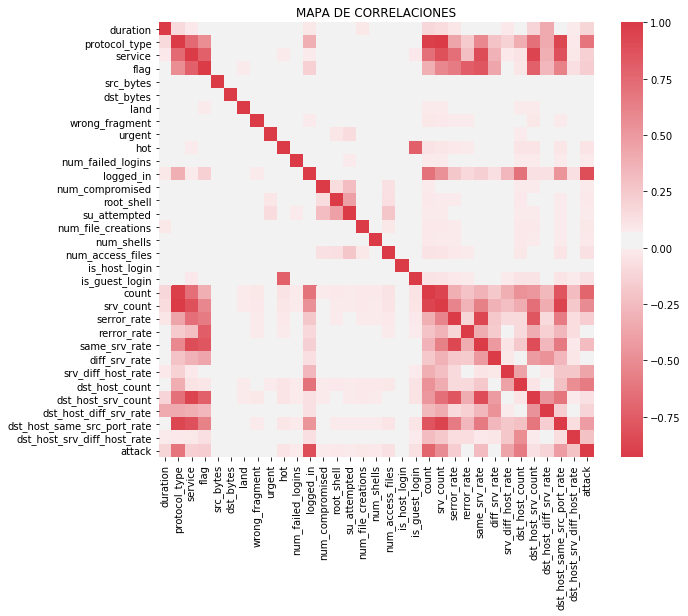

In [43]:
f,ax = plt.subplots(figsize=(10, 8)) 
corr = train.corr() 
sb.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sb.diverging_palette(10, 10, as_cmap=True), square=True, ax=ax) 
plt.title("MAPA DE CORRELACIONES")

In [44]:
corr = train.corr()
corr[['attack']].sort_values(by = 'attack',ascending = False)\
.style.background_gradient()

,attack
attack,1.000000
count,0.767366
dst_host_count,0.656904
srv_count,0.575453
dst_host_same_src_port_rate,0.486674
serror_rate,0.229935
diff_srv_rate,0.015960
wrong_fragment,0.007629
rerror_rate,0.003601
src_bytes,0.000235


Del mapa de calor anterior podemos observar que  flag está negativamente relacionado con service y con protocol_type, pero con attack tiene una relación un poco más débil, mientras que service y protocol_type tienen una relación negativamente más fuerte. 
Service y protocol_type tienen una relación fuerte con attack de forma negativa, por tanto eliminaremos service, para que no sea un valor redundante.


In [45]:
train.drop('service', axis = 1, inplace = True) 

In [54]:
test.drop('service', axis = 1, inplace = True) 

In [55]:
train.head(5)

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,attack
0,0,0,9,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,508,508,0.0,0.0,1.00,0.00,0.0,255,255,0.0,1.0,0.0,1
1,0,0,9,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,1.00,0.00,0.0,255,255,0.0,1.0,0.0,1
2,0,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,152,4,1.0,0.0,0.03,0.09,0.0,255,4,0.1,0.0,0.0,1
3,0,0,9,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,1.00,0.00,0.0,255,255,0.0,1.0,0.0,1
4,0,0,9,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,1.00,0.00,0.0,255,255,0.0,1.0,0.0,1


In [56]:
test.head(5)

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,attack
0,0,0,9,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,510,510,0.0,0.0,1.00,0.00,0.0,255,255,0.00,1.0,0.0,1
1,0,0,9,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,1.00,0.00,0.0,255,255,0.00,1.0,0.0,1
2,0,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,268,11,1.0,0.0,0.04,0.06,0.0,255,11,0.08,0.0,0.0,1
3,0,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,122,13,1.0,0.0,0.11,0.07,0.0,255,13,0.06,0.0,0.0,1
4,0,0,9,520,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,1.00,0.00,0.0,255,255,0.00,1.0,0.0,1


In [47]:
columns = list(train.columns)
columns

['duration',
 'protocol_type',
 'flag',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'attack']

In [51]:
train.to_csv("/Users/geraldine/Documents/IDS/DATASET/datafifth/new_data_train.csv")

In [ ]:
train.to_csv("/Users/geraldine/Documents/IDS/DATASET/datafifth/new_data_train_copy.csv")

In [57]:
test.to_csv("/Users/geraldine/Documents/IDS/DATASET/datafifth/new_data_test.csv")

In [ ]:
test.to_csv("/Users/geraldine/Documents/IDS/DATASET/datafifth/new_data_test_copy.csv")